# Primary Turnout by Age - Democratic

In [1]:

%matplotlib ipympl
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ma_voter_analysis.plotting import *
from ma_voter_analysis.processing import *

In [6]:
YEARS = [2012, 2014, 2016, 2018, 2020, 2022]
challenger_years = [2012, 2014, 2016, 2018]

cur_registered_df = load_voter_list(
    "../data/cambridge/49VOT_285911.txt", date_for_age="2024-09-06"
)

In [4]:


primary = (
    pd.read_csv("../data/cambridge/sept-primaries-compiled.csv",low_memory=False)
    .rename({"Unnamed: 0": "year"}, axis=1)
    .set_index(["year", "Voter ID Number"])
)
primary["Party Affiliation"] = primary["Party Affiliation"].str.strip()
general = load_full_dataset("../data/cambridge")
general = general[general["State Representative District"] == 142]

In [ ]:

primary = primary[primary["Party Affiliation"].isin(["D", "U"])]
general = general[general["Party Affiliation"].isin(["D", "U"])]

## 25th Middlesex


This is the only State House district that is entirely contained within Cambridge. It was unchanged in the 2021 redistricting, so we can effectively compare historical voting patterns. This seat has been occupied by Marjorie Decker since 2012.


Competitive years??? like truly ocmpetitive - not jus tpihllips opponents


Party registration determines which primary someone can vote in. If they are registered with a party, they must vote in that primary, if they are unaffiliated then they can 


### Shift in Electorate Age


Since Decker's initial eleciton in 2012 there has been a significant decrease in the age of the electorate. In 2012 voters under 40 were 21% of all voters. In 2022 they were 46%. This change has happened despite Decker never facing a serious challenger


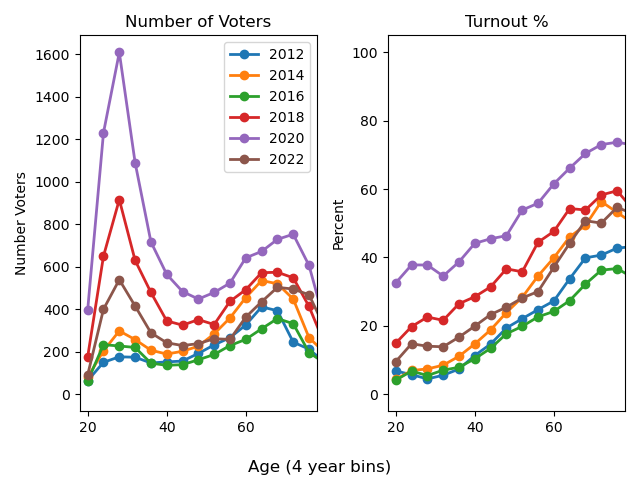

In [7]:

bin_size = 4
age_grouped = turnout_by_year_key(primary, "age", bin_size)
fig, axs = plt.subplots(1,2,)
lw = 2
for year in YEARS:
    mid_points = age_grouped.loc[year]['mid_points']
    # if year in challenger_years:
    #     lw = 4
    # else:
    #     lw = 2
    axs[0].plot(mid_points, age_grouped.loc[year]['voted'], marker='o', label=year,linewidth=lw)
    axs[1].plot(mid_points, age_grouped.loc[year]['turnout']*100, marker='o', label=year,linewidth=lw)
    # (age_grouping.loc[year]['turnout']*100).plot(marker='o', label=year, ax=axs[1])
axs[0].legend()
axs[1].set_title("Turnout %")
axs[0].set_title("Number of Voters")
axs[0].set_ylabel("Number Voters")
axs[1].set_ylabel("Percent")
axs[0].set_xlim([18, 78])
axs[1].set_xlim([18, 78])
fig.supxlabel(f"Age ({bin_size} year bins)")
plt.tight_layout()

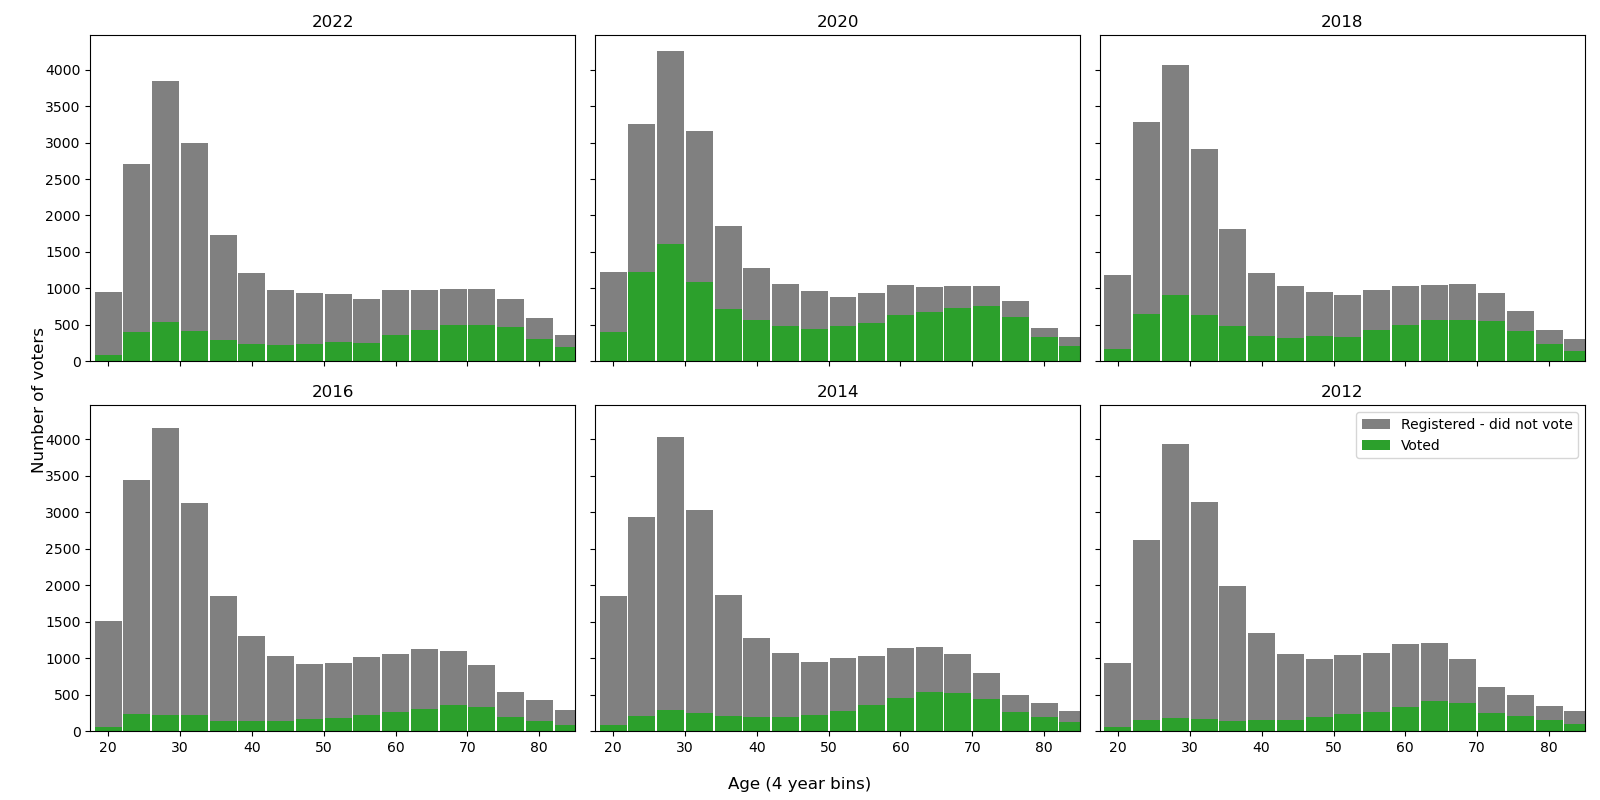

In [8]:
fig, axs = multi_year_bar(
    age_grouped, turnout_bar_graph, years_per_row=3, figsize=(16, 8)
)
fig.supxlabel("Age (4 year bins)")
fig.supylabel("Number of voters")
axs[-1][-1].legend()
axs[-1, -1].set_xlim([17.5, 85])
plt.tight_layout();